# MIE 1624 Assignment 1

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import random
import statistics

### Load data

In [2]:
df= pd.read_csv('clean_kaggle_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Columns: 247 entries, Unnamed: 0 to Q34_OTHER_TEXT
dtypes: int64(31), object(216)
memory usage: 23.6+ MB


C:\Users\dell\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (74,78,115,147,154,172,176,213,225,229,232) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Question 1

### Load data for Question 1

In [3]:
# Q1: Age
# Q3: Country
# Q4: Education
# Q15: Professional Experience
# Q10: Salary

df1 = df[['Q1','Q3','Q4','Q15','Q10']]
df1.head()

,Q1,Q3,Q4,Q15,Q10
0,22-24,France,Master’s degree,1-2 years,40000
1,40-44,India,Professional degree,I have never written code,7500
2,40-44,Australia,Master’s degree,1-2 years,300000
3,22-24,India,Bachelor’s degree,< 1 years,5000
4,50-54,France,Master’s degree,20+ years,70000


### Salary of people at different ages

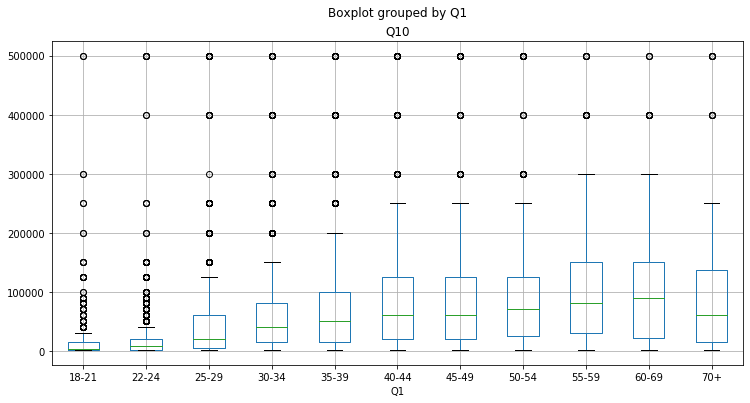

In [4]:
df1.boxplot('Q10',by='Q1',figsize=(12,6))

**Summary:**
<br>
People at age of 60-60 have the highest average salary with the largest variance. People at age of 18-21 have the lowest average salary with the lowest variance. The average salary depicts an increasing trend as the age increases till 60-69.

### Salary of people at different education levels

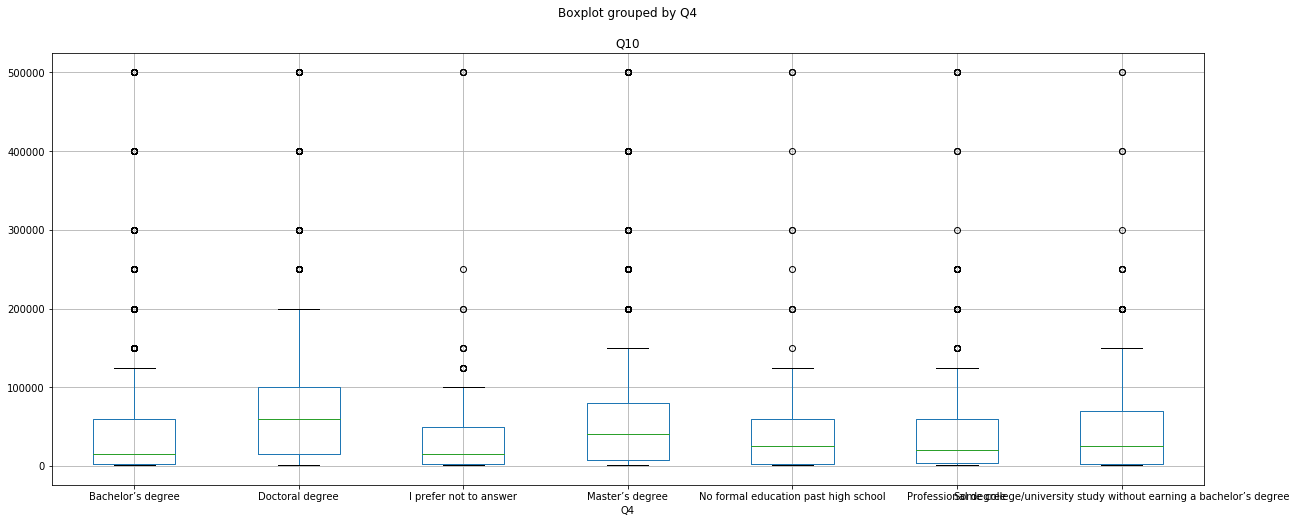

In [5]:
df1.boxplot('Q10',by='Q4',figsize=(20,8))

**Summary:**
<br>
People with Doctoral degree have the highest average salary with the largest variance. People with Bachelor's degree have the lowest average salary with a low variance. The average salaries of people with Master's degree and Doctoral degree are apparently higher than others.

### Salary of people with different professional experience

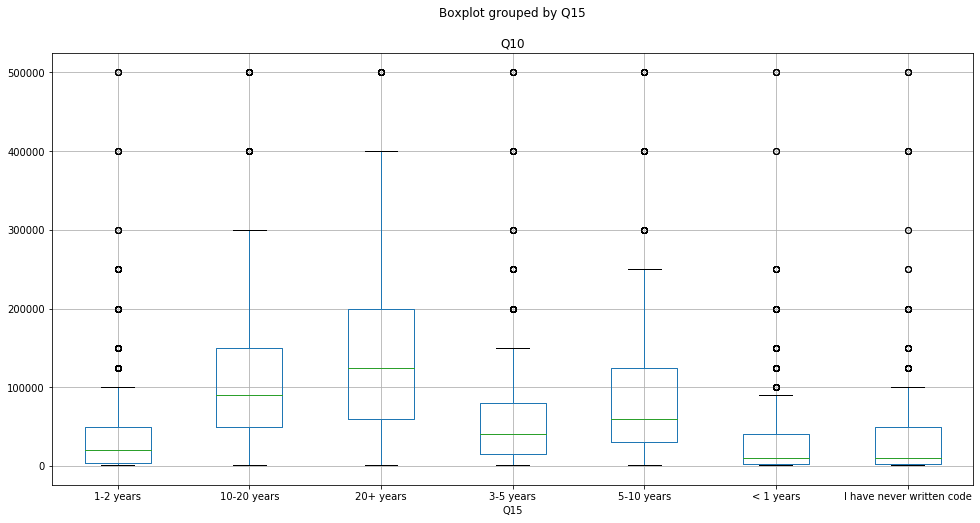

In [6]:
df1.boxplot('Q10',by='Q15',figsize=(16,8))

**Summary:**
<br>
People with long professional experiences tend to have higher salaries with larger variances compared to those with little or no professional experience.

# Question 2

### Load data for Question 2

In [7]:
df2 = df[['Q2','Q10']]
df2.head()

,Q2,Q10
0,Male,40000
1,Male,7500
2,Male,300000
3,Male,5000
4,Male,70000


## Part a

### Descriptive statistics for male

In [8]:
df2_m = df2.loc[df2['Q2']=='Male']
df2_m.describe()

,Q10
count,10473.000000
mean,58709.586556
std,74920.620048
min,1000.000000
25%,7500.000000
50%,30000.000000
75%,80000.000000
max,500000.000000


### Descriptive statistics for female

In [9]:
df2_fe = df2.loc[df2['Q2']=='Female']
df2_fe.describe()

,Q10
count,1827.000000
mean,45933.771210
std,60253.789591
min,1000.000000
25%,3000.000000
50%,20000.000000
75%,70000.000000
max,500000.000000


## Part b

In [10]:
# convert df to array
salary_m = df2_m['Q10'].to_numpy()
salary_fe = df2_fe['Q10'].to_numpy()

### Two-sample t-test

$H_0$: There's no difference between the means of female salary and male salary.
<br>
$H_a$: There's a difference between the means of female salary and male salary.
<br>
$\alpha$ = 5%

***Assumptions**: 
Variances of salaries for males and females are equal.
Samples are taken from a normally distributed population.

In [11]:
t, p= stats.ttest_ind(salary_m, salary_fe)
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  5.108938811599026e-12
reject null hypothesis


Conclusion: Reject the null hypothesis since the p-value is smaller than $\alpha$. There's a difference between the means of female salary and male salary.

## Part c

### Bootstrapping

In [12]:
n = 1000 #number of times to re-sample

salary_m_bootstrap = []
salary_fe_bootstrap = []

for i in range(n):
    salary_m_avg = np.mean(salary_m[np.random.randint(len(salary_m),size= len(salary_m))])
    salary_fe_avg = np.mean(salary_fe[np.random.randint(len(salary_fe),size= len(salary_fe))])
    salary_m_bootstrap.append(salary_m_avg)
    salary_fe_bootstrap.append(salary_fe_avg)

### Bootstrapped distributions for males and females

Text(0.5, 1.0, 'bootstrapped distributions of salary for males and females')

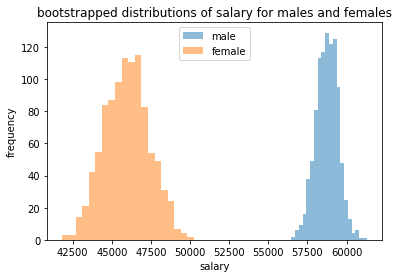

In [13]:
plt.hist(salary_m_bootstrap, bins = 20,label = 'male', alpha = 0.5)
plt.hist(salary_fe_bootstrap, bins = 20,label = 'female', alpha = 0.5)
plt.legend()
plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('bootstrapped distributions of salary for males and females')

### Distribution of the difference in means for males and females

In [14]:
# difference in mean
mu_salary_m = np.mean(salary_m_bootstrap)
mu_salary_fe = np.mean(salary_fe_bootstrap)
mu_diff = mu_salary_m - mu_salary_fe

# difference in variance
var_salary_m = np.var(salary_m_bootstrap)
var_salary_fe = np.var(salary_fe_bootstrap)
var_diff = var_salary_m/n + var_salary_fe/n

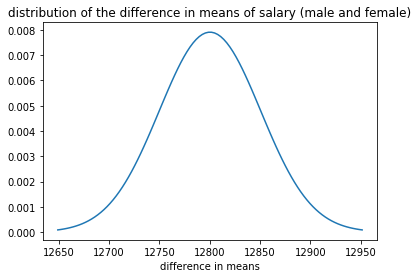

In [15]:
mu = mu_diff
sigma = math.sqrt(var_diff)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('difference in means')
plt.title('distribution of the difference in means of salary (male and female)')
plt.show()

## Part d

### Two-sample t-test on the bootstrapped data

$H_0$: There's no difference between the means of female salary and male salary.
<br>
$H_a$: There's a difference between the means of female salary and male salary.
<br>
$\alpha$ = 5%


***Assumptions**: 
Variances of average salaries for males and females are equal.
Samples are taken from a normally distributed population.

In [16]:
t, p= stats.ttest_ind(salary_m_bootstrap, salary_fe_bootstrap)
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.0
reject null hypothesis


Conclusion: Reject the null hypothesis since the p-value is smaller than $\alpha$. There's a difference between the means of female salary and male salary.

## Part e

T-tests on both original data and bootstrapped data concluded that there is a difference of average salaries between male and female.This great difference was also demonstrated by the bootstrapped distributions and the distribution of the difference in means.The average salary of male is much larger than female.

### Pros and cons of bootstrapping

**Pros:** Bootstrapping does not require assumptions on the distributions of data.
<br>
**Cons:** Bootstrapping depends a lot on the sample population distribution. In other words, it can only tell the information from the sample data.

### Pros and cons of t-test

**Pros:** T-test is robust to compare attributes of two objests with all assumptions held to be true. 
<br>
**Cons:** T-test cannot be used for multiple comparisons. It also does not work very well when assumptions are not closed to be true.

# Question 3

### Load data for Question 2

In [17]:
df3 = df[['Q4','Q10']]
df3.head()

,Q4,Q10
0,Master’s degree,40000
1,Professional degree,7500
2,Master’s degree,300000
3,Bachelor’s degree,5000
4,Master’s degree,70000


## Part a

### Descriptive statistics for Bachelor’s degree

In [18]:
df3_ba = df3.loc[df3['Q4']=='Bachelor’s degree']
df3_ba.describe()

,Q10
count,3361.000000
mean,44999.256174
std,67923.680798
min,1000.000000
25%,3000.000000
50%,15000.000000
75%,60000.000000
max,500000.000000


### Descriptive statistics for Doctoral degree

In [19]:
df3_doc = df3.loc[df3['Q4']=='Doctoral degree']
df3_doc.describe()

,Q10
count,2083.000000
mean,75761.401824
std,83376.717093
min,1000.000000
25%,15000.000000
50%,60000.000000
75%,100000.000000
max,500000.000000


### Descriptive statistics for Master’s degree

In [20]:
df3_ma = df3.loc[df3['Q4']=='Master’s degree']
df3_ma.describe()

,Q10
count,5868.000000
mean,58778.629857
std,70265.728605
min,1000.000000
25%,7500.000000
50%,40000.000000
75%,80000.000000
max,500000.000000


## Part b

In [21]:
# convert df to array
salary_ba = df3_ba['Q10'].to_numpy()
salary_doc = df3_doc['Q10'].to_numpy()
salary_ma = df3_ma['Q10'].to_numpy()

### ANOVA

$H_0$: There is no difference among the means of bachelor, master and doctor salary.
<br>
$H_a$: There is at least one of the means of bachelor, master and doctor salary that is not equal.
<br>
$\alpha$ = 5%

***Assumptions**: 
Variances of salaries for bachelor, master and doctor are equal.
Samples are taken from a normally distributed population.

In [22]:
# one way F-test
F, p = stats.f_oneway(salary_ba, salary_doc, salary_ma)
print("f-value is: ", F)
print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f-value is:  117.83927746561437
p-value for significance is:  2.233668506153945e-51
reject null hypothesis


Conclusion: Reject the null hypothesis since the p-value is smaller than $\alpha$. There is at least one of the means of bachelor, master and doctor salary that is not equal.

## Part c

### Bootstrapping

In [23]:
n = 1000 #number of times to re-sample

salary_ba_bootstrap = []
salary_doc_bootstrap = []
salary_ma_bootstrap = []

for i in range(n):
    salary_ba_avg = np.mean(salary_ba[np.random.randint(len(salary_ba),size= len(salary_ba))])
    salary_doc_avg = np.mean(salary_doc[np.random.randint(len(salary_doc),size= len(salary_doc))])
    salary_ma_avg = np.mean(salary_ma[np.random.randint(len(salary_ma),size= len(salary_ma))])
    salary_ba_bootstrap.append(salary_ba_avg)
    salary_doc_bootstrap.append(salary_doc_avg)
    salary_ma_bootstrap.append(salary_ma_avg)

### Bootstrapped distributions for different education backgrounds

Text(0.5, 1.0, 'bootstrapped distributions of salary for different education backgrounds')

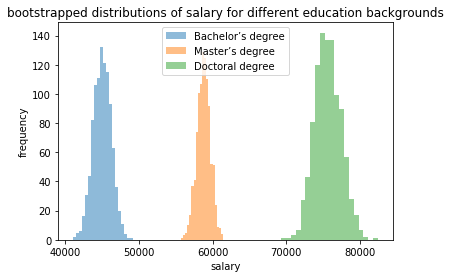

In [24]:
plt.hist(salary_ba_bootstrap, bins = 20,label = 'Bachelor’s degree', alpha = 0.5)
plt.hist(salary_ma_bootstrap, bins = 20,label = 'Master’s degree', alpha = 0.5)
plt.hist(salary_doc_bootstrap, bins = 20,label = 'Doctoral degree', alpha = 0.5)
plt.legend(loc='best')
plt.xlabel('salary')
plt.ylabel('frequency')
plt.title('bootstrapped distributions of salary for different education backgrounds')

### Distribution of the difference in means of salary (Master’s degree and Bachelor’s degree)

In [25]:
# difference in mean
mu_salary_ba = np.mean(salary_ba_bootstrap)
mu_salary_ma = np.mean(salary_ma_bootstrap)
mu_diff_ma_ba = mu_salary_ma - mu_salary_ba

# difference in variance
var_salary_ba = np.var(salary_ba_bootstrap)
var_salary_ma = np.var(salary_ma_bootstrap)
var_diff_ma_ba = var_salary_ba/n + var_salary_ma/n

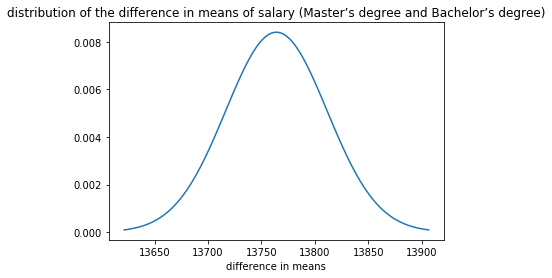

In [26]:
mu = mu_diff_ma_ba
sigma = math.sqrt(var_diff_ma_ba)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('difference in means')
plt.title('distribution of the difference in means of salary (Master’s degree and Bachelor’s degree)')
plt.show()

### Distribution of the difference in means of salary (Doctoral degree and Bachelor’s degree)

In [27]:
# difference in mean
mu_salary_ba = np.mean(salary_ba_bootstrap)
mu_salary_doc = np.mean(salary_doc_bootstrap)
mu_diff_doc_ba = mu_salary_doc - mu_salary_ba

# difference in variance
var_salary_ba = np.var(salary_ba_bootstrap)
var_salary_doc = np.var(salary_doc_bootstrap)
var_diff_doc_ba = var_salary_ba/n + var_salary_doc/n

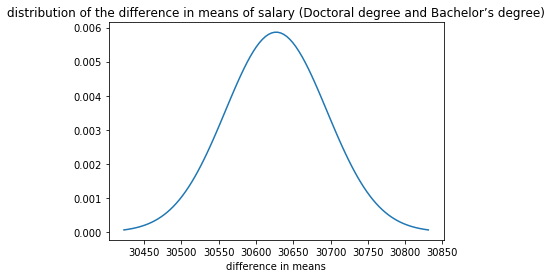

In [28]:
mu = mu_diff_doc_ba
sigma = math.sqrt(var_diff_doc_ba)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('difference in means')
plt.title('distribution of the difference in means of salary (Doctoral degree and Bachelor’s degree)')
plt.show()

### Distribution of the difference in means of salary (Doctoral degree and Master’s degree)

In [29]:
# difference in mean
mu_salary_ma = np.mean(salary_ma_bootstrap)
mu_salary_doc = np.mean(salary_doc_bootstrap)
mu_diff_doc_ma = mu_salary_doc - mu_salary_ma

# difference in variance
var_salary_ma = np.var(salary_ma_bootstrap)
var_salary_doc = np.var(salary_doc_bootstrap)
var_diff_doc_ma = var_salary_ma/n + var_salary_doc/n

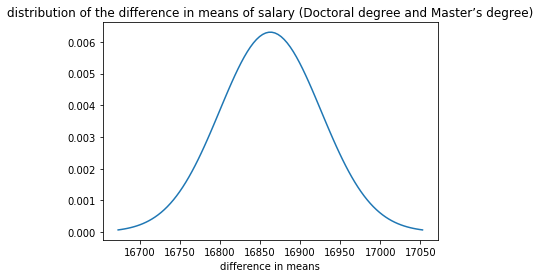

In [30]:
mu = mu_diff_doc_ma
sigma = math.sqrt(var_diff_doc_ma)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.xlabel('difference in means')
plt.title('distribution of the difference in means of salary (Doctoral degree and Master’s degree)')
plt.show()

# Part d

### ANOVA on the bootstrapped data

$H_0$: There is no difference among the means of bachelor, master and doctor salary.
<br>
$H_a$: There is at least one of the means of bachelor, master and doctor salary that are not equal.
<br>
$\alpha$ = 5%

***Assumptions**: 
Variances of average salaries for bachelor, master and doctor are equal.
Samples are taken from a normally distributed population.

In [31]:
# one way F-test
F, p = stats.f_oneway(salary_ba_bootstrap, salary_doc_bootstrap, salary_ma_bootstrap)
print("f-value is: ", F)
print("p-value for significance is: ", p)

if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

f-value is:  129599.88680143112
p-value for significance is:  0.0
reject null hypothesis


Conclusion: Reject the null hypothesis since the p-value is smaller than $\alpha$. There is at least one of the means of bachelor, master and doctor salary that are not equal.

# Part e

ANOVA on both original data and bootstrapped data concluded that there is at least one of the average salaries of bachelor, master and doctor that are not identical to others. These great differences were also demonstrated by the bootstrapped distributions and the distributions of the difference in means between each two of three groups. The average salary of doctoral degree is larger than Master's degree and the average salary of Master's degree is larger than Bachelor's degree.

### Pros and cons of ANOVA

**Pros:** ANOVA can be used for multiple comparison. It is also more robust than t-test.
<br>
**Cons:**  It is difficult to use ANOVA under strict assumptions. It also does not work very well when rejecting the null hypothesis.  